In [502]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

DataFrame = pd.read_csv("E:\Mentorness Internship\drive-download-20240318T124305Z-001\Customer Churn Prediction\Customer_Churn.csv") 
DataFrame.head()
#df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [503]:
DataFrame.drop('customerID',axis=1,inplace=True)
DataFrame.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [504]:
DataFrame.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [505]:
DataFrame[DataFrame.TotalCharges== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [506]:
#see the number of undefined values
len(DataFrame[DataFrame.TotalCharges== ' '])

11

In [507]:
#transform this columns into numeric values ,coerce -> enforce the space can't be transformed into NULL
DataFrame['TotalCharges']=pd.to_numeric(DataFrame['TotalCharges'],errors='coerce')

In [508]:
DataFrame[DataFrame.TotalCharges== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [509]:
DataFrame.iloc[[488,753,3826],:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No


In [510]:
DataFrame.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [511]:
DataFrame.TotalCharges.describe()


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [512]:
DataFrame['TotalCharges']=DataFrame['TotalCharges'].fillna(DataFrame['TotalCharges'].mean())
DataFrame.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Some Cleaning **

In [513]:
DataFrame.columns=DataFrame.columns.str.lower()
DataFrame.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [514]:
DataFrame.churn=(DataFrame.churn == 'Yes').astype(int)
DataFrame.churn.value_counts()
# we notices that the data isn't balanced which could affect the Model 
#we need to handle it differently

churn
0    5174
1    1869
Name: count, dtype: int64

EDA

In [515]:
DataFrame['seniorcitizen']=DataFrame['seniorcitizen'].astype(object)
DataFrame.select_dtypes(include=['object']).columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [516]:
#Transform those columns into lists
categorical_data=list(DataFrame.select_dtypes(include=['object']).columns)
numerical_data=list(DataFrame.select_dtypes(include=['number']).columns)

In [517]:
numerical_data.remove('churn')

In [518]:
#Shows the number of unique categories in the dataframe
DataFrame[categorical_data].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

 Feature Importance

 we will evaluate the importance of the features used 



Risk Ratio
risk=Group rate / Global Rate

risk ~=1 --> not risky

risk <1 ---> less likely to churn

risk >1 ---> more likely to churn


In [519]:
#We calculate the global rate
global_mean=DataFrame.churn.mean()
global_mean


0.2653698707936959

In [520]:
DataFrame.groupby('gender').churn.mean()

gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64

In [521]:
#we calculate the group rate for features we have

churn_gender=DataFrame.groupby('gender').churn.mean()

gender_risk=churn_gender/global_mean
gender_risk

#gender isn't an effective feature

gender
Female    1.014466
Male      0.985807
Name: churn, dtype: float64

In [522]:
DataFrame.groupby('partner').churn.mean()
#partner is a quiet effective feature

partner
No     0.329580
Yes    0.196649
Name: churn, dtype: float64

In [523]:
#we calculate the group rate for features we have

churn_partner=DataFrame.groupby('partner').churn.mean()

partner_risk=churn_partner/global_mean
partner_risk

#partner is a quiet effective feature

partner
No     1.241964
Yes    0.741038
Name: churn, dtype: float64

In [524]:
for feature in categorical_data :
    df_group=DataFrame.groupby(by=feature).churn.agg(['mean'])
    df_group['diff']=df_group['mean'] - global_mean
    df_group['risk']=df_group['mean'] / global_mean
    print(df_group)

            mean      diff      risk
gender                              
Female  0.269209  0.003839  1.014466
Male    0.261603 -0.003766  0.985807
                   mean      diff      risk
seniorcitizen                              
0              0.236062 -0.029308  0.889557
1              0.416813  0.151443  1.570686
             mean      diff      risk
partner                              
No       0.329580  0.064210  1.241964
Yes      0.196649 -0.068721  0.741038
                mean      diff      risk
dependents                              
No          0.312791  0.047422  1.178700
Yes         0.154502 -0.110868  0.582215
                  mean      diff      risk
phoneservice                              
No            0.249267 -0.016103  0.939319
Yes           0.267096  0.001726  1.006506
                      mean      diff      risk
multiplelines                                 
No                0.250442 -0.014927  0.943749
No phone service  0.249267 -0.016103  0.939319


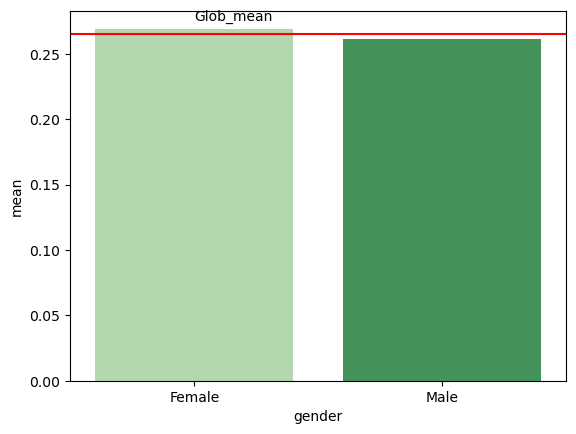

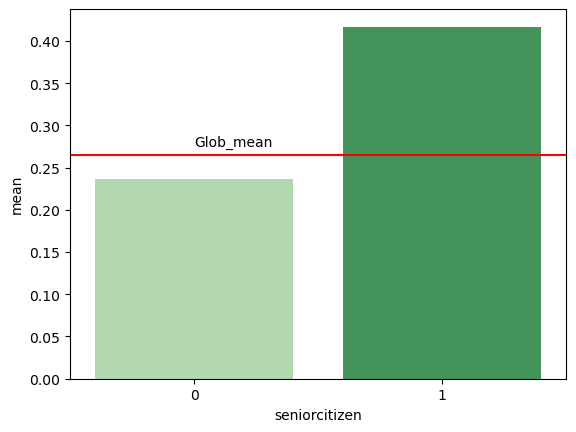

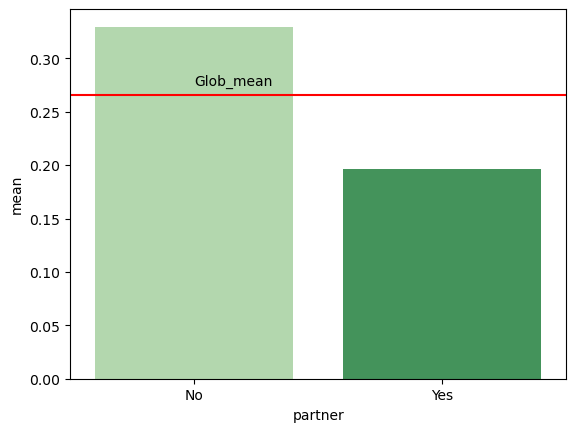

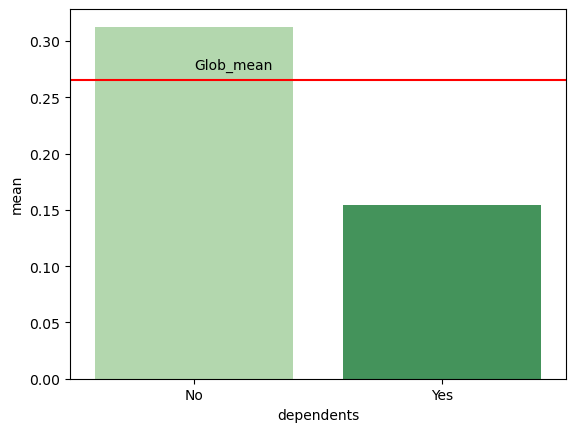

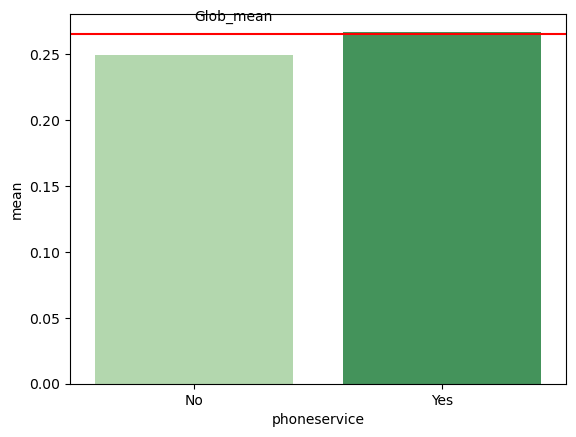

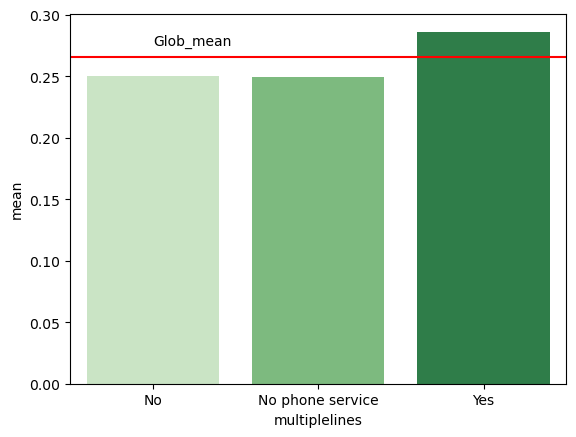

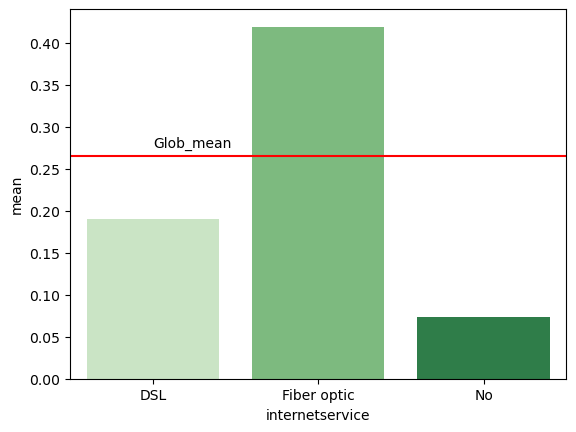

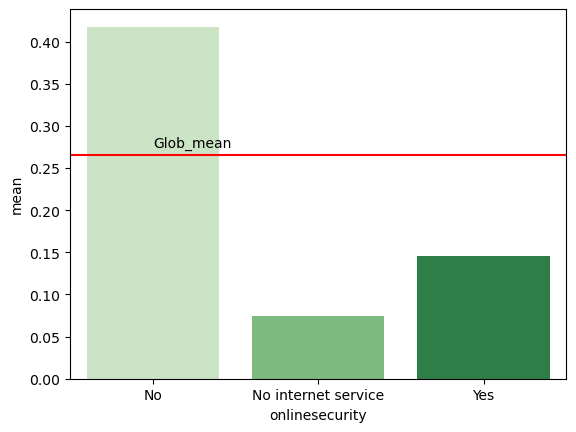

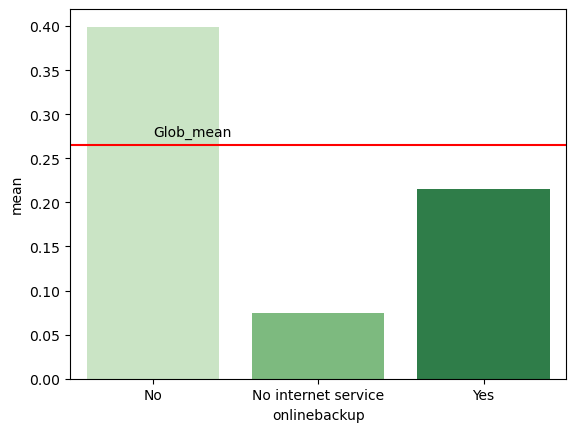

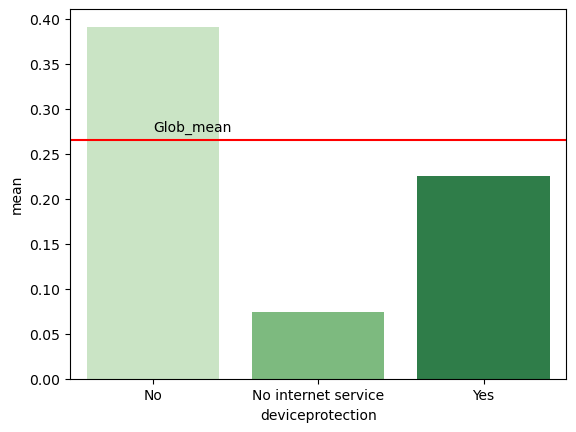

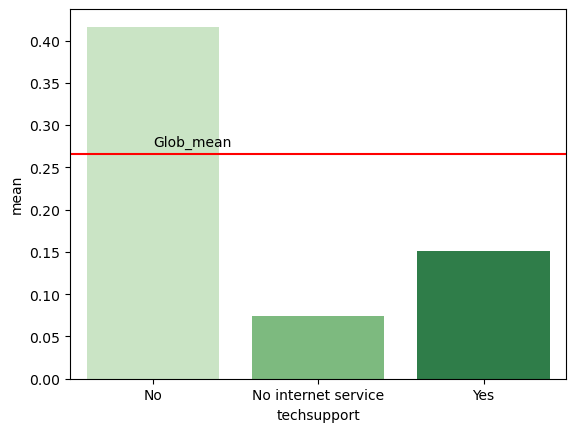

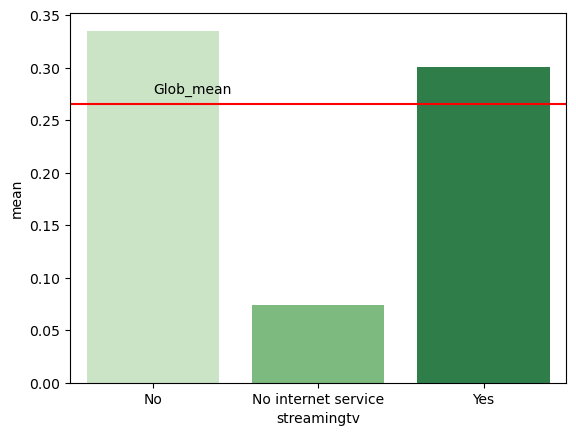

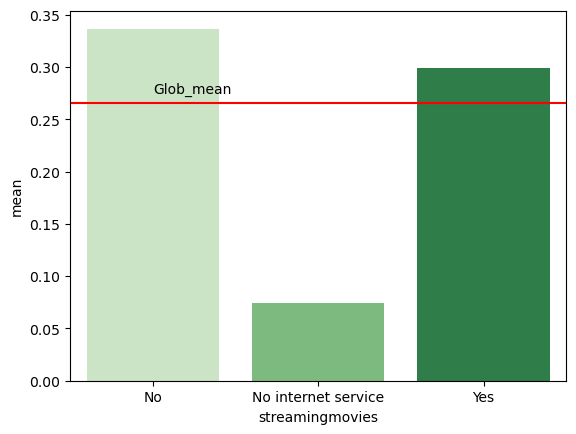

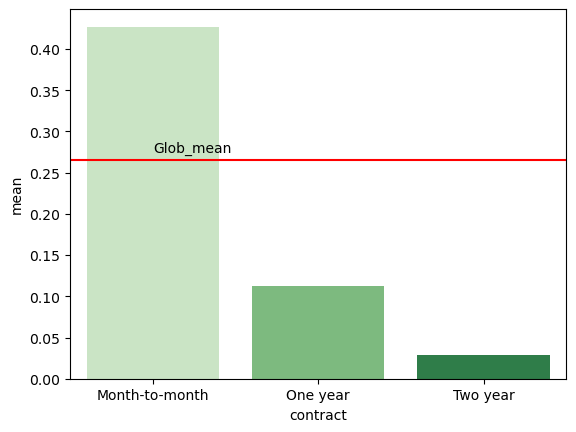

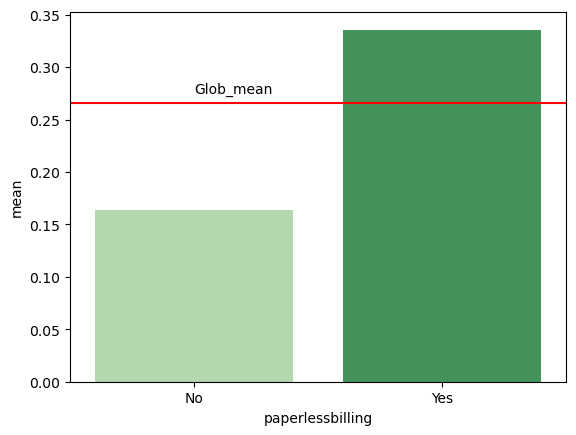

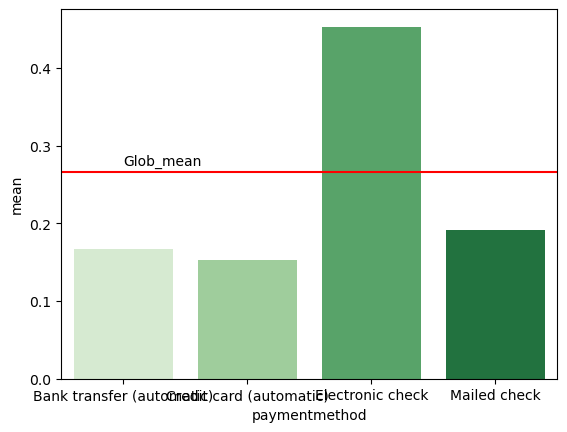

In [525]:
for feature in categorical_data :
    df_group=DataFrame.groupby(by=feature).churn.agg(['mean']).reset_index()
    q=sns.barplot(x=feature, y='mean', data=df_group , palette='Greens')
    q.axhline(global_mean,color='r')
    plt.text(0,global_mean+0.01,"Glob_mean",color='black')
    plt.show()

Feature Importance 

Correlation Coefficients

In [526]:
DataFrame[numerical_data].corrwith(DataFrame.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.199428
dtype: float64

Data Spliting [Training dataset,Validation dataset,Testing dataset]

In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(DataFrame, test_size=0.2, random_state=1)
df_train, df_validate = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_validate.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


Mutual Information 


MI(feature;target) = Entropy(feature) - Entropy(feature|target)


Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.

In [ ]:
from sklearn.metrics import mutual_info_score

def calculate_MutualInfo(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical_data].apply(calculate_MutualInfo)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='Mutual Information')
display(df_mi.head())
display(df_mi.tail())

,Mutual Information
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,Mutual Information
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


PreProcessing 
Handling Categorical & Numerical Data

--> One Hot Encoding applying to Categorical Data
--> StandardScaler applying to Numerical Data

In [ ]:
# Applying one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()
   
    return X_train , X_valid, X_test, columns

In [ ]:
X_train , X_valid, X_test, columns = preprocess(df_train, df_validate, df_test, numerical_data, categorical_data)

y_train = df_train['churn']
y_valid = df_validate['churn']
y_test = df_test['churn']

Building the Model

1) Logistic Regression Model

Build the model on the whole dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='liblinear', random_state=1)
model_1.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [ ]:
print('LogisticRegression Training Accuracy: ', round(model_1.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_1.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_1.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.8
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.81


Predication For Model 1

In [ ]:
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

x_predict = model_1.predict(X_test)
print(classification_report(y_test, x_predict))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.62      0.59      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



I will Do the Training on the Most Important Feature ,that we have extracted from Mutual Info.

In [ ]:
import_cat = df_mi.head().index.to_list()
import_cat

X_train, X_valid, X_test, columns = preprocess(df_train, df_validate, df_test, numerical_data, import_cat)

model_2 = LogisticRegression(solver='liblinear', random_state=1)
model_2.fit(X_train, y_train)

print('LogisticRegression Training Accuracy: ', round(model_2.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_2.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_2.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.79
LogisticRegression Validation Accuracy:  0.8
LogisticRegression Testing Accuracy:  0.8


I will build the Model on only the numberical features

In [ ]:
X_train = df_train[numerical_data]
X_valid = df_validate[numerical_data]
X_test  = df_test[numerical_data]

model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3.fit(X_train, y_train)
print('LogisticRegression Training Accuracy: ', round(model_3.score(X_train, y_train), 2))
print('LogisticRegression Validation Accuracy: ', round(model_3.score(X_valid, y_valid), 2))
print('LogisticRegression Testing Accuracy: ', round(model_3.score(X_test, y_test), 2))

LogisticRegression Training Accuracy:  0.78
LogisticRegression Validation Accuracy:  0.79
LogisticRegression Testing Accuracy:  0.79


The 3 Models are quite close to each other which indicate that using onyl the third model should be the best option as I has only 3 Features

Predication For the Third Model

In [ ]:
x_predict3 = model_3.predict(X_test)
print(classification_report(y_test, x_predict3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1061
           1       0.61      0.45      0.52       348

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Prediction using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1061
           1       0.46      0.52      0.49       348

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.74      0.73      0.73      1409

